In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#%load_ext nb_black

In [2]:
df = pd.read_csv('data/IMDb movies.csv', error_bad_lines=False)

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [4]:
df.shape

(85855, 22)

In [5]:
df.dtypes

imdb_title_id             object
title                     object
original_title            object
year                      object
date_published            object
genre                     object
duration                   int64
country                   object
language                  object
director                  object
writer                    object
production_company        object
actors                    object
description               object
avg_vote                 float64
votes                      int64
budget                    object
usa_gross_income          object
worlwide_gross_income     object
metascore                float64
reviews_from_users       float64
reviews_from_critics     float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [7]:
df.isna().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

In [38]:
df.describe()

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics,cluster
count,85855.000000,85855.000000,8.585500e+04,13305.000000,78258.000000,74058.000000,85855.000000
mean,100.351418,5.898656,9.493490e+03,55.896881,46.040826,27.479989,5.504362
std,22.553848,1.234987,5.357436e+04,17.784874,178.511411,58.339158,5.213449
min,41.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000,0.000000
25%,88.000000,5.200000,2.050000e+02,43.000000,4.000000,3.000000,0.000000
50%,96.000000,6.100000,4.840000e+02,57.000000,9.000000,8.000000,5.000000
75%,108.000000,6.800000,1.766500e+03,69.000000,27.000000,23.000000,11.000000
max,808.000000,9.900000,2.278845e+06,100.000000,10472.000000,999.000000,16.000000


In [8]:
features = ['duration']

data = df[features].copy()
data.fillna(-999, inplace=True) #fill null vlaues with -999
data = data.values

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
"""
the data has been standardized
"""
scaler = StandardScaler()
data = scaler.fit_transform(data.reshape(-1,1))
print(data)

[[-2.45420385]
 [-1.34573909]
 [-2.09949512]
 ...
 [ 1.31457632]
 [-0.10425856]
 [-1.16838473]]


In [12]:
from sklearn.cluster import KMeans
from time import time

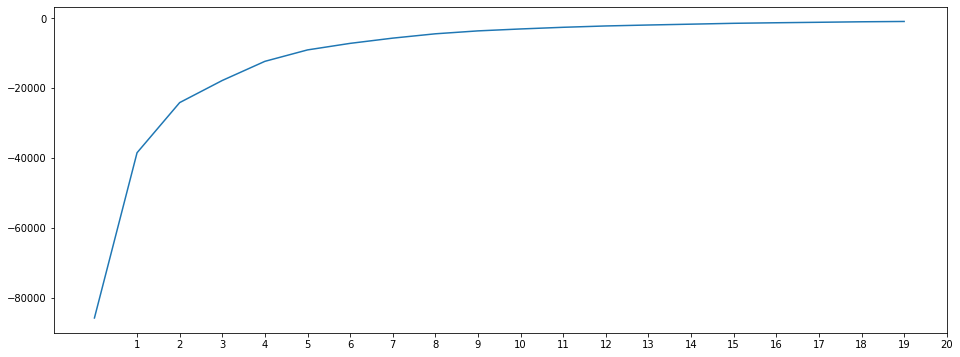

In [13]:
"""
we don't know anythin abouit data. We don't know wha tis best number of clusters to best split the data
We need ot find optimal number of clusters
Problems are : 1)need to find optimal number of clusters and 2) need to know where location of clusters are
We need to calcualte model's inertia. 
inertia is just the mean squared distnce between the records and their centroids
we need a low intertia. The lower inertia the better b/c that means the centroid is in its best location, therefore
    minimizing the mean squared distance between those and by default the algorithm runs a number of times and then it
    keeps hte model with the lowest mean squared distance.
If we have a # of clusters equal tothe number of observations that would mean that the distance will be minimum

Way to find optimal number of clusters is by using the elbow method.  
going t ogo throug ha range of 1 to 20 clusters
then going to fit hte data with specific amount of clusters
going to calcualte scores for each model and then plot
pick hte elbow of the curve as the number of clusters
wit heach new run intertia gets closet to 0
"""
#%%time
n_cluster = range(1,21)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

f = plt.figure(1, figsize=(16,6))
plt.plot(scores)
_ = plt.xticks(n_cluster)


In [14]:
"""
get the best number of clisters based on elbow method, where the difference between scores is smaller than 90%
    percentile
"""

scores = np.array(scores)
dif_scores = scores / scores[0]
dif_scores = np.diff(dif_scores)
n_clusters = np.argwhere(dif_scores < np.quantile(dif_scores, 0.9))[-1][0]
print(n_clusters)

17


In [15]:
"""
let's check the 1st observation
"""

preds = KMeans(n_clusters = n_clusters).fit_predict(data)
print(f"First observation's cluster: {preds[0]}")

First observation's cluster: 7


In [16]:
"""
how ca nwe use kmeans for anamoly detection
going to select clusters that have least amount of observations

We took last 2 clusters based on their value count
"""
df = pd.DataFrame(df)
df['cluster'] = preds

outliers = [
    x
    for x in zip(
        df['cluster'].value_counts().iloc[-2:].index,
        df['cluster'].value_counts().iloc[-2:].values,
    )
]

In [17]:
"""
we're going to take cluster 13 that has only 2 observations
cluster 5 has 14 observations
"""

df['cluster'].value_counts()

8     15697
9     14229
0     12639
2     11883
11     9206
5      5657
12     4670
15     3370
1      2606
14     2161
7      1943
3      1342
4       303
13       93
10       41
6        13
16        2
Name: cluster, dtype: int64

In [18]:
"""
list of tuples
1st item in tuple is predicted cluster, 2nd is number of observations

"""

outliers

[(6, 13), (16, 2)]

In [19]:
"""
get onl the categories that contain a number of observations in the lower quartile of 1%

"""
clusters = [
    x[0]
    for x in outliers
    if x[1] < np.quantile(df['cluster'].value_counts().values, 0.01) 
    
]

In [20]:
"""


"""
clusters

[16]

In [21]:
"""
print records in cluster 2
we have feature b/ we're only analyzing feature duration
a duration of 729
"""
for c in clusters:
    print(df[df.cluster == c][features])
    

       duration
38038       729
85057       808


In [22]:
"""
we can see that maximum i 808
mean and std show this is an extreme value
"""

df[features].describe()

,duration
count,85855.000000
mean,100.351418
std,22.553848
min,41.000000
25%,88.000000
50%,96.000000
75%,108.000000
max,808.000000


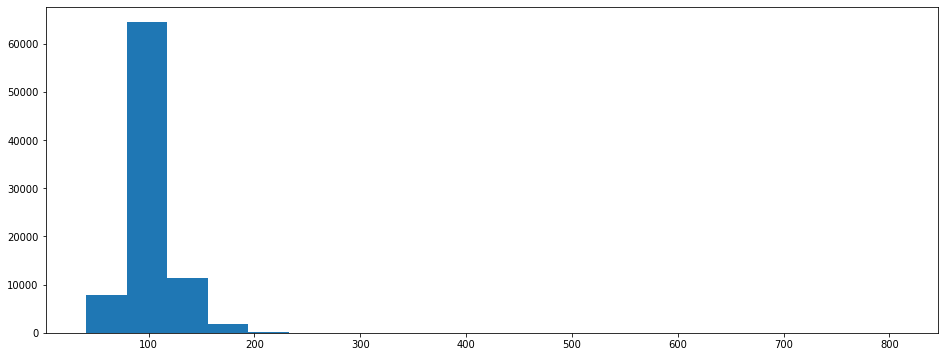

In [23]:
"""
we jave observations up until 800
pretty obvious we have outliers
"""

f = plt.figure(1, figsize=(16,6))
_ = plt.hist(df[features].values, bins=20)

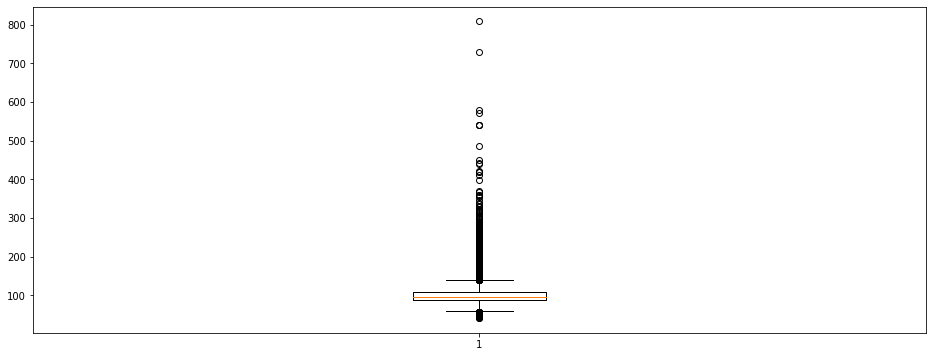

In [24]:
"""
outliers around 800
problem could have easily been solved by plotting boxplot or gettingthe histogram data
"""

f = plt.figure(1, figsize=(16,6))
_ = plt.boxplot(df[features].values)

In [25]:
features = ['duration','votes','reviews_from_users']

data = df[features].copy()
data.fillna(-999, inplace=True) #fill null vlaues with -999
data = data.values
print(data)

[[  45.  154.    1.]
 [  70.  589.    7.]
 [  53.  188.    5.]
 ...
 [ 130.  265. -999.]
 [  98.  194. -999.]
 [  74.  102. -999.]]


In [26]:
"""
b/c we have multiple feature we donlt need ot reshape data
"""
scaler = StandardScaler()
data = scaler.fit_transform(data)
print(data)

[[-2.45420385 -0.17432862  0.13858782]
 [-1.34573909 -0.16620901  0.15611908]
 [-2.09949512 -0.17369398  0.15027533]
 ...
 [ 1.31457632 -0.17225672 -2.78329018]
 [-0.10425856 -0.17358199 -2.78329018]
 [-1.16838473 -0.17529924 -2.78329018]]


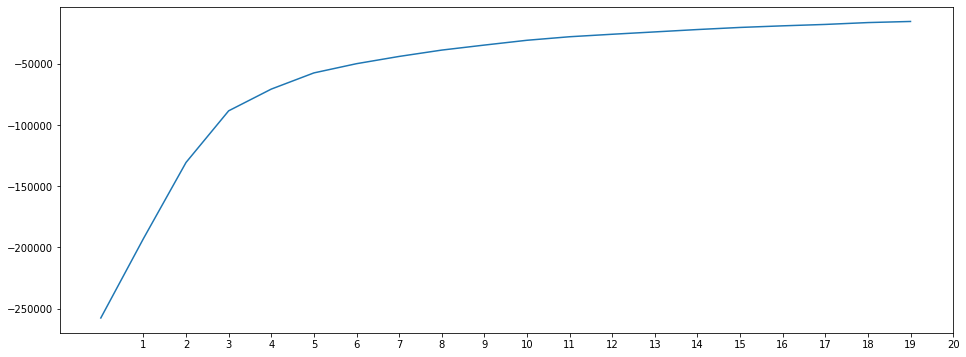

In [27]:
"""
KMeans algorithm with multiple numerical features
elbow looks more dlearly defined
"""
#%%time
n_cluster = range(1,21)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

f = plt.figure(1, figsize=(16,6))
plt.plot(scores)
_ = plt.xticks(n_cluster)


In [28]:
scores = np.array(scores)
dif_scores = scores / scores[0]
dif_scores = np.diff(dif_scores)
n_clusters = np.argwhere(dif_scores < np.quantile(dif_scores, 0.9))[-1][0]
print(n_clusters)

17


In [29]:

preds = KMeans(n_clusters = n_clusters).fit_predict(data)
print(f"First observation's cluster: {preds[0]}")

First observation's cluster: 8


In [30]:
df = pd.DataFrame(df)
df['cluster'] = preds

outliers = [
    x
    for x in zip(
        df['cluster'].value_counts().iloc[-2:].index,
        df['cluster'].value_counts().iloc[-2:].values,
    )
]

In [31]:
#cluster 14 with 14 values
df['cluster'].value_counts()

0     29753
11    20347
8      9540
5      8768
1      6240
16     4271
12     2256
3      1659
7      1342
4       879
15      362
14      159
2       158
10       54
6        38
13       16
9        13
Name: cluster, dtype: int64

In [32]:
outliers

[(13, 16), (9, 13)]

In [33]:
#ouliersin lower 10% of data
clusters = [
    x[0]
    for x in outliers
    if x[1] < np.quantile(df['cluster'].value_counts().values, 0.10) 
    
]

In [34]:
#we get 2 clusters
clusters

[13, 9]

In [35]:
#print out our anamolies/outliers
#use KMeans t odetect outliers in a dataset
for c in clusters:
    print(df[df.cluster == c][features])
    

       duration  votes  reviews_from_users
61          421   4166                25.0
137         418    309                 1.0
333         418   1889                19.0
18005       442    715                19.0
22227       410    149                 1.0
28510       439   9024                56.0
38038       729   1126                13.0
39346       580    157                 NaN
46153       540    305                 1.0
50674       540    131                 NaN
53877       540    165                 2.0
54835       570    225                 NaN
56257       450    366                 1.0
63720       398    193                 1.0
75922       485    251                 1.0
85057       808    473                 5.0
       duration    votes  reviews_from_users
15528       175  1572674              3977.0
28066       142  1755490              2416.0
28381       154  1780147              3058.0
28453       142  2278845              8232.0
31279       178  1619920              5392.0

In [36]:
df[features].describe()

,duration,votes,reviews_from_users
count,85855.000000,8.585500e+04,78258.000000
mean,100.351418,9.493490e+03,46.040826
std,22.553848,5.357436e+04,178.511411
min,41.000000,9.900000e+01,1.000000
25%,88.000000,2.050000e+02,4.000000
50%,96.000000,4.840000e+02,9.000000
75%,108.000000,1.766500e+03,27.000000
max,808.000000,2.278845e+06,10472.000000
